# Análise de dados sobre a Saúde Mundial
### Gabriel Peres e Wollace de Macêdo

### Primeiramente, é importante salientar que o dataframe a seguir (nomeado de  "data") refere-se aos respectivos indicadores socioeconômicos e de saúde pública de cada país e região do mundo. Tal base de dados — por sua vez, obtida do Banco Mundial — está compreendida entre os anos de 1960 e 2015. Eis, então, a leitura do arquivo. 

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as gp
import plotly.graph_objs as go

'''
Para facilitar a manipulação do dataframe ao longo do trabalho — e eventuais fatiamentos —,
convertemos as colunas compreendidas pelos anos de strings para inteiros.
'''

data = pd.read_csv('data.csv')
dataa = data.columns
anosd = dataa[4:-1]
for a in anosd:
    data.rename(columns = {a:int(a)}, inplace = True)


In [2]:
data

Country Name Country Code  \
0       Arab World          ARB   
1       Arab World          ARB   
2       Arab World          ARB   
3       Arab World          ARB   
4       Arab World          ARB   
...            ...          ...   
89005     Zimbabwe          ZWE   
89006     Zimbabwe          ZWE   
89007     Zimbabwe          ZWE   
89008     Zimbabwe          ZWE   
89009     Zimbabwe          ZWE   

                                          Indicator Name     Indicator Code  \
0      % of females ages 15-49 having comprehensive c...  SH.HIV.KNOW.FE.ZS   
1      % of males ages 15-49 having comprehensive cor...  SH.HIV.KNOW.MA.ZS   
2      Adolescent fertility rate (births per 1,000 wo...        SP.ADO.TFRT   
3      Adults (ages 15+) and children (0-14 years) li...        SH.HIV.TOTL   
4      Adults (ages 15+) and children (ages 0-14) new...     SH.HIV.INCD.TL   
...                                                  ...                ...   
89005  Use of insecticide-treated bed nets (% of unde...     SH.MLR.NETS.ZS   
89006  Use of Intermittent Preventive Treatment of ma...     SH.MLR.SPF2.ZS   
89007  Vitamin A supplementation coverage rate (% of ...     SN.ITK.VITA.ZS   
89008           Wanted fertility rate (births per woman)        SP.DYN.WFRT   
89009  Women's share of population ages 15+ living wi...  SH.DYN.AIDS.FE.ZS   

             1960        1961        1962        1963        1964        1965  \
0             NaN         NaN         NaN         NaN         NaN         NaN   
1             NaN         NaN         NaN         NaN         NaN         NaN   
2      133.555013  134.159119  134.857912  134.504576  134.105211  133.569626   
3             NaN         NaN         NaN         NaN         NaN         NaN   
4             NaN         NaN         NaN         NaN         NaN         NaN   
...           ...         ...         ...         ...         ...         ...   
89005         NaN         NaN         NaN         NaN         NaN         NaN   
89006         NaN         NaN         NaN         NaN         NaN         NaN   
89007         NaN         NaN         NaN         NaN         NaN         NaN   
89008         NaN         NaN         NaN         NaN         NaN         NaN   
89009         NaN         NaN         NaN         NaN         NaN         NaN   

       ...       2007       2008       2009       2010       2011       2012  \
0      ...        NaN        NaN        NaN        NaN        NaN        NaN   
1      ...        NaN        NaN        NaN        NaN        NaN        NaN   
2      ...  49.999851  49.887046  49.781207  49.672975  49.536047  49.383745   
3      ...        NaN        NaN        NaN        NaN        NaN        NaN   
4      ...        NaN        NaN        NaN        NaN        NaN        NaN   
...    ...        ...        ...        ...        ...        ...        ...   
89005  ...        NaN        NaN  17.300000        NaN   9.700000        NaN   
89006  ...        NaN        NaN  13.900000        NaN   7.300000        NaN   
89007  ...  83.000000   0.000000  77.000000  49.000000  47.000000  61.000000   
89008  ...        NaN        NaN        NaN        NaN   3.500000        NaN   
89009  ...  58.586086  58.760796  58.812421  58.825943  58.899308  58.939080   

            2013       2014       2015  Unnamed: 60  
0            NaN        NaN        NaN          NaN  
1            NaN        NaN        NaN          NaN  
2      48.796558  48.196418        NaN          NaN  
3            NaN        NaN        NaN          NaN  
4            NaN        NaN        NaN          NaN  
...          ...        ...        ...          ...  
89005        NaN  26.800000        NaN          NaN  
89006        NaN  12.900000        NaN          NaN  
89007  34.000000  32.000000        NaN          NaN  
89008        NaN        NaN        NaN          NaN  
89009  58.900126  58.822335  58.855551          NaN  

[89010 rows x 61 columns]

# Significado de cada coluna:
### Country Name: Nome do país/região 
### Country Code: Código do país/região
### Indicator Name: Nome do indicador socioeconômico
### Indicator Code: Códido do indicador socioeconômico
### 1960-2015: As taxas anuais do respectivo indicador socioeconômico

# Lista de indicadores socioeconômicos:

In [3]:
lista = list(data['Indicator Name'])
lista

['% of females ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 '% of males ages 15-49 having comprehensive correct knowledge about HIV (2 prevent ways and reject 3 misconceptions)',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Adults (ages 15+) and children (0-14 years) living with HIV',
 'Adults (ages 15+) and children (ages 0-14) newly infected with HIV',
 'Adults (ages 15+) living with HIV',
 'Adults (ages 15+) newly infected with HIV',
 'Age at first marriage, female',
 'Age at first marriage, male',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old',
 'Age dependency ratio, young',
 'Age population, age 0, female, interpolated',
 'Age population, age 0, male, interpolated',
 'Age population, age 01, female, interpolated',
 'Age population, age 01, male, interpolated',
 'Age population, age 02, female, interpolated',
 'Age population, age 02, male, interpolated',
 'Ag

# Pirâmides etárias

In [4]:
# Obtendo todas as faixas etárias
f_e = []
m = []
f = []
for ind in lista:
    if ind.startswith('Male population'):
        f_e.append(ind[16:])
        m.append(ind)
    elif ind.startswith('Female population'):
        f.append(ind)
faixas_idade = f_e[0:17] 
masculino = m[0:17] # Indicadores masculinos
feminino = f[0:17] # Indicadores Femininos
faixas_idade[0:2] = '0-4', '5-9' # Intervalos etários

def piramide(country, year):
    pais = data[data[f'Country Name'] == country] # Dataframe filtrado pelo país
    conjunto = set(pais[f'Indicator Name'])
    fe = []  # Delimitando o filtro do dataframe
    for ind in conjunto:
        if ind.startswith('Male population') or ind.startswith('Female population'):
            fe.append(ind)
    filtro = pais[pais[f'Indicator Name'].isin(fe)]
    cm = list(filtro.loc[filtro[f'Indicator Name'].isin(masculino), year]) # Faixas etárias dos Homens
    cf = list(filtro.loc[filtro[f'Indicator Name'].isin(feminino), year]) # Faixas etárias das Mulheres
    
    # Dataframe (em formato longo) que será plotado na pirâmide
    d = {
        'Faixas etárias' : faixas_idade,
        'Homens' : cm,
        'Mulheres' : cf
    }
    df = pd.DataFrame(d)
    
    # Convertendo as populações de float para int 
    df = df.astype({'Homens': int, 'Mulheres':int})
    
    # Obtendo o valor máximo para a plotagem de intervalos
    p_h = list(df['Homens'])
    p_m = list(df['Mulheres'])
    if max(p_h) > max(p_m):
        smaximo = str(max(p_h))
    else:
        smaximo = str(max(p_m))
        
    # Formatando o valor para ser usado como parâmetro de mensuração
    nf = round(float(f'{smaximo[0]}.{smaximo[1]}') + 0.5)
    p = []
    p0 = []
    n = int(f"{nf}{len(smaximo[1:]) * '0'}")
    
    # Atribuindo diferentes intervalos para diferentes valores máximos
    if n < 10**(6):
        p.append((-1) * n)
        while n > 0:
            n = n - 10**(5)
            p.append((-1) * n)
        a0 = p[:len(p) - 1]
        a0.reverse()
        for u0 in a0:
            p.append((-1) * u0)
        for i0 in p:
            if i0 < 0:
                s0 = str((-1) * i0)
                p0.append(f'{s0[0]}K')
            else:
                s0 = str(i0)
                p0.append(f'{s0[0]}K')
    elif 10**(6) <= n <= 5*(10**(6)):
        p.append((-1) * n)
        while n > 0:
            n = n - 5*(10**(5))
            p.append((-1) * n)
        a0 = p[:len(p) - 1]
        a0.reverse()
        for u0 in a0:
            p.append((-1) * u0)
        for i0 in p:
            if i0 < 0:
                s0 = str((-1) * i0)
                if len(s0[1:]) == 6:
                    if s0[1] == '0':
                        p0.append(f'{s0[0]}M')
                    else:
                        p0.append(f'{s0[0]}.{s0[1]}M')
                elif len(s0[1:]) == 5 or s0 == '0':
                    p0.append(f'{s0[0]}K')
            else:
                s0 = str(i0)
                if len(s0[1:]) == 6:
                    if s0[1] == '0':
                        p0.append(f'{s0[0]}M')
                    else:
                        p0.append(f'{s0[0]}.{s0[1]}M')
                elif len(s0[1:]) == 5 or s0 == '0':
                    p0.append(f'{s0[0]}K')
    elif 5*(10**(6)) < n <= 10 * (10**(6)):
        p.append((-1) * n)
        while n > 0:
            n = n - 10**(6)
            p.append((-1) * n)
        a0 = p[:len(p) - 1]
        a0.reverse()
        for u0 in a0:
            p.append((-1)* u0)
        for i0 in p:
            if i0 < 0:
                s0 = str(i0 * (-1))
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[0]}0M')
                else:
                    p0.append(f'{s0[0]}M')
            else:
                s0 = str(i0)
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[0]}0M')
                else:
                    p0.append(f'{s0[0]}M')
    elif 10 * (10**(6)) < n <= 30 * (10**(6)):
        p.append((-1) * n)
        while n > 0:
            n = n - 2* (10**(6))
            p.append((-1) * n)
        a0 = p[:len(p) - 1]
        a0.reverse()
        for u0 in a0:
            p.append((-1) * u0)
        for i0 in p:
            if i0 < 0:
                s0 = str((-1) * i0)
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[:2]}M')
                elif len(s0[1:]) == 6 or s0 == '0':
                    p0.append(f'{s0[0]}M')
            else:
                s0 = str(i0)
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[:2]}M')
                elif len(s0[1:]) == 6 or s0 == '0':
                    p0.append(f'{s0[0]}M')
    elif n > 30 * (10**(6)):
        p.append((-1) * n)
        while n > 0:
            n = n - 10 *(10**(6))
            p.append((-1) * n)
        a0 = p[:len(p) - 1]
        a0.reverse()
        for u0 in a0:
            p.append((-1)* u0)
        for i0 in p:
            if i0 < 0:
                s0 = str(i0 * (-1))
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[0]}0M')
                else:
                    p0.append(f'{s0[0]}M')
            else:
                s0 = str(i0)
                if len(s0[1:]) == 7:
                    p0.append(f'{s0[0]}0M')
                else:
                    p0.append(f'{s0[0]}M')
    
    # Plotagem do dataframe na pirâmide etária
        
    y = df['Faixas etárias']
    x1 = df['Homens']
    x2 = df['Mulheres'] * -1

    fig = go.Figure()

    fig.add_trace(go.Bar(
    y=y, x=x1, name='Men', orientation='h', marker=dict(color='rgb(0,0,255)')
    ))
    fig.add_trace(go.Bar(
    y=y, x=x2, name='Women', orientation='h', marker=dict(color='rgb(255,20,147)')
    ))
    
    # Formatando a pirâmide etária
    fig.update_layout(
        title = f'Population of {country} — {year}',
        template = 'plotly_white',
        title_font_size = 24,
        barmode = 'relative',
        bargap=0.0,
        bargroupgap=0,
        xaxis=dict(
            tickvals=p,
            ticktext=p0,
            title='Population',
            title_font_size=15
        ),
        yaxis=dict(
        title='Ages',
        title_font_size=15
        )
    )
    fig.show()


# Comparando as pirâmides etárias dos BRICS na primeira década do século XXI

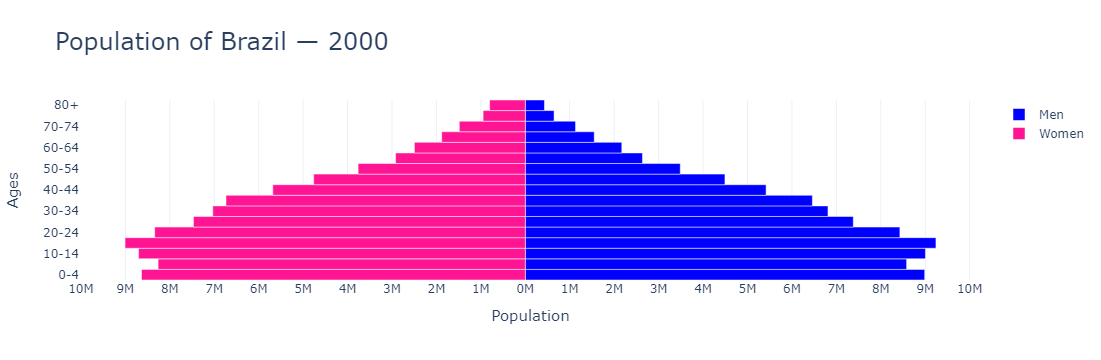

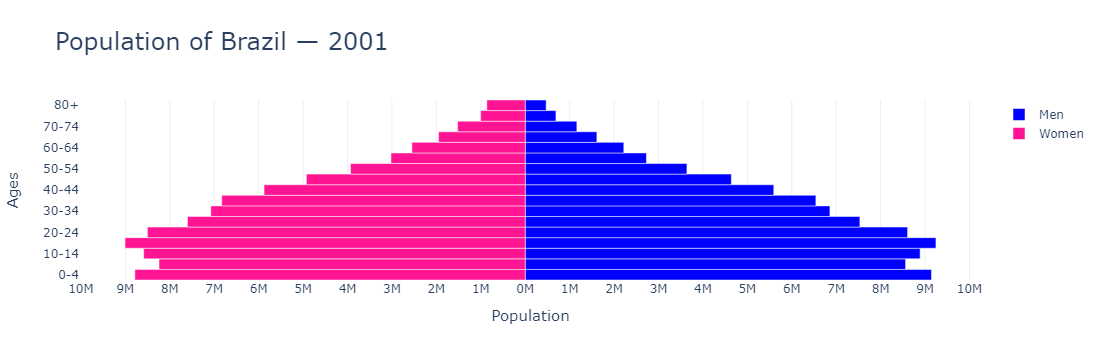

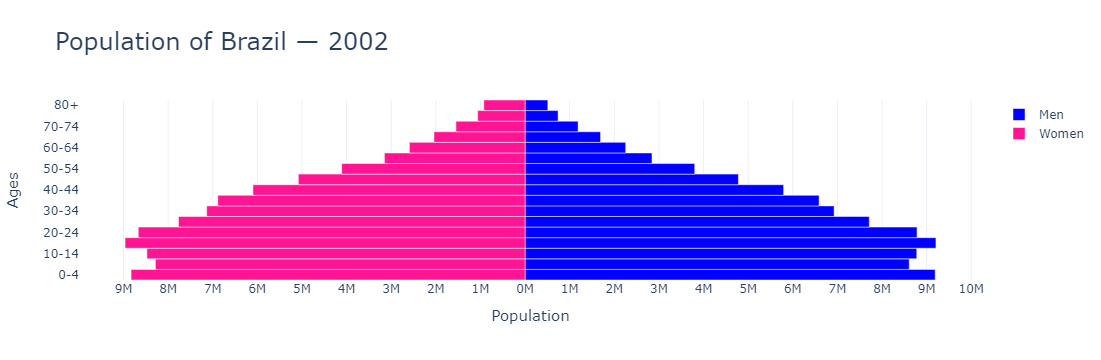

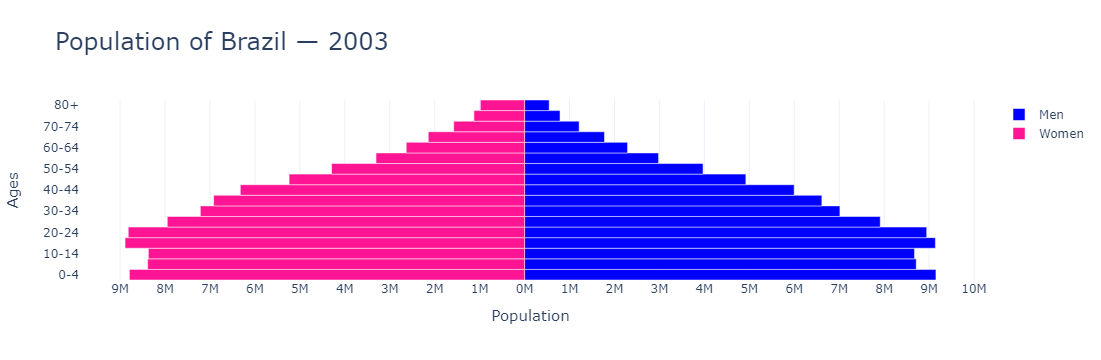

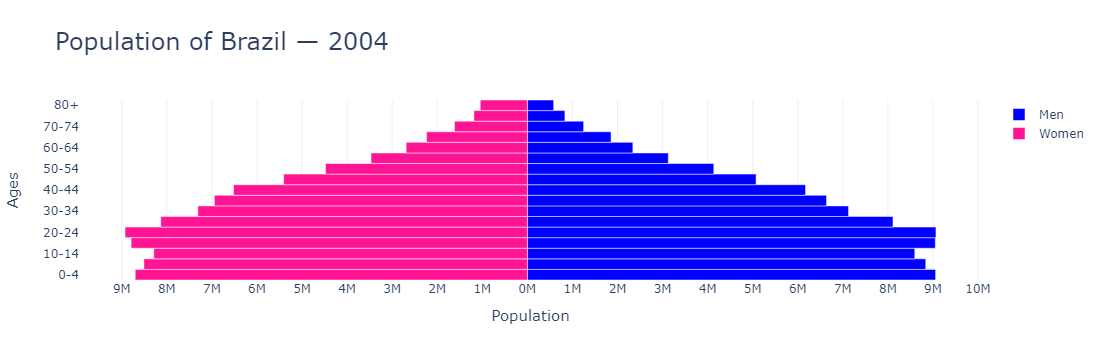

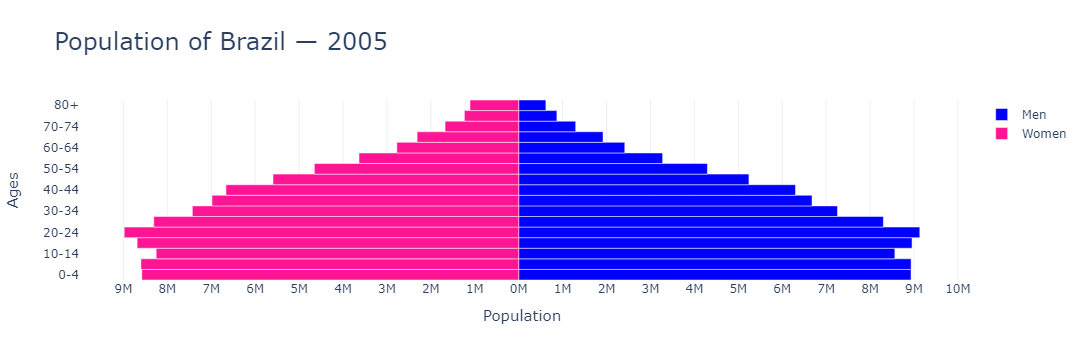

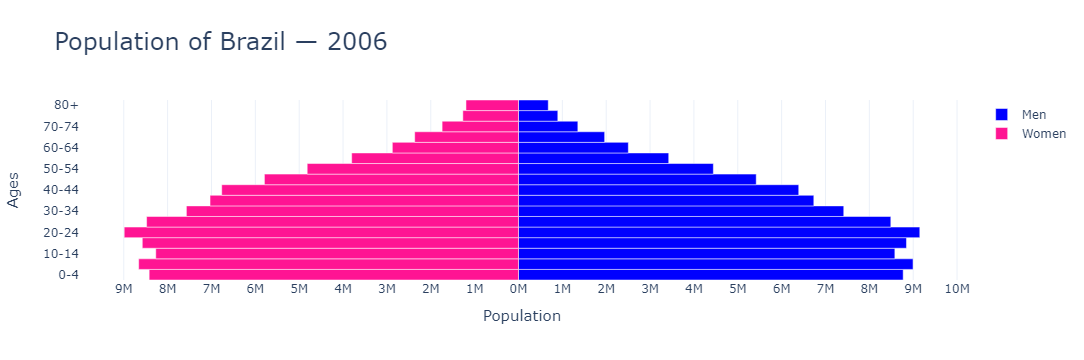

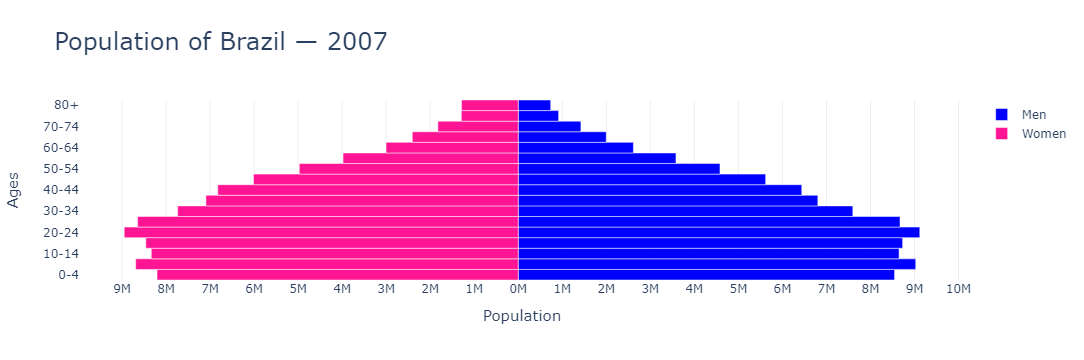

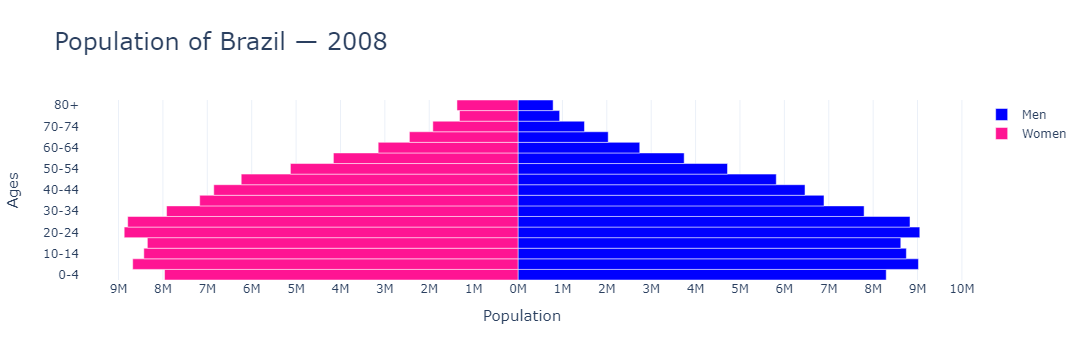

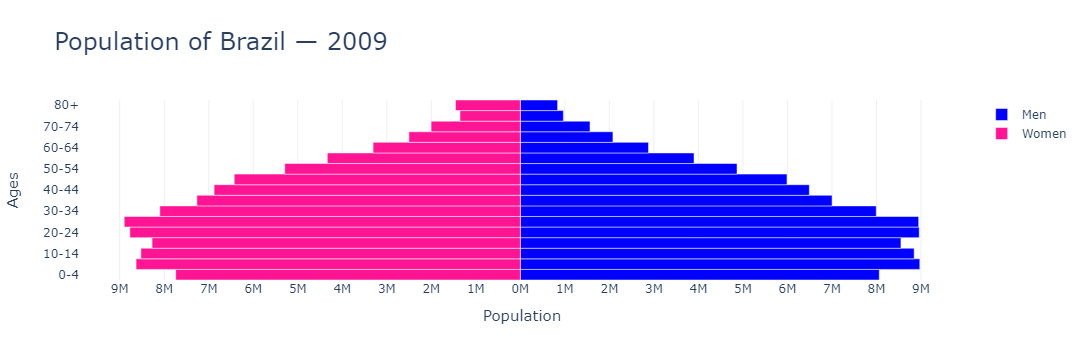

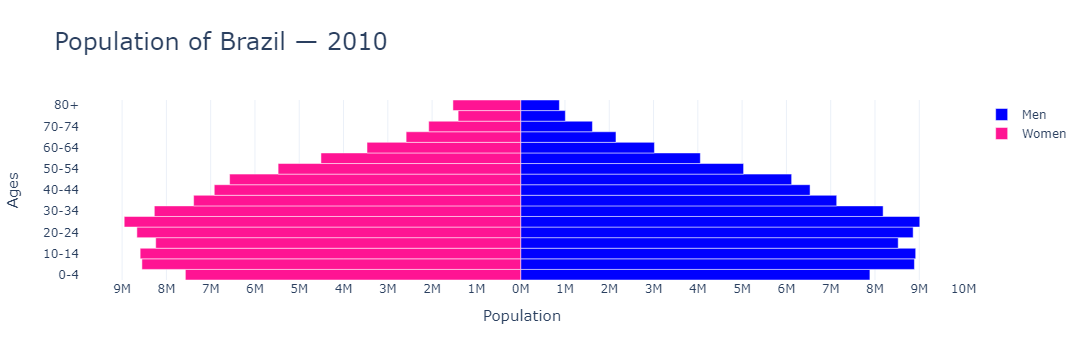

In [5]:
for ano in range(2000, 2011):
    piramide('Brazil', ano)

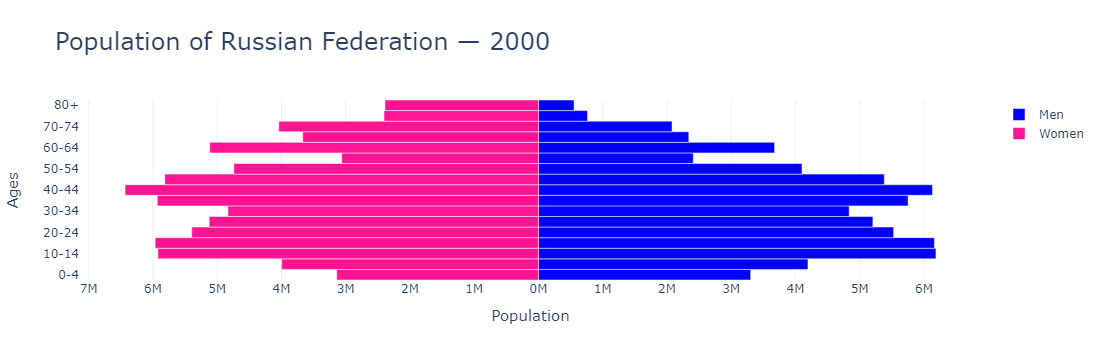

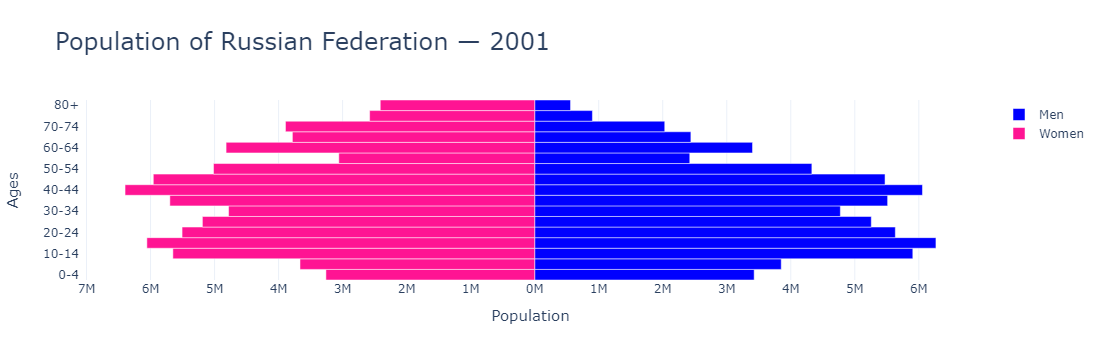

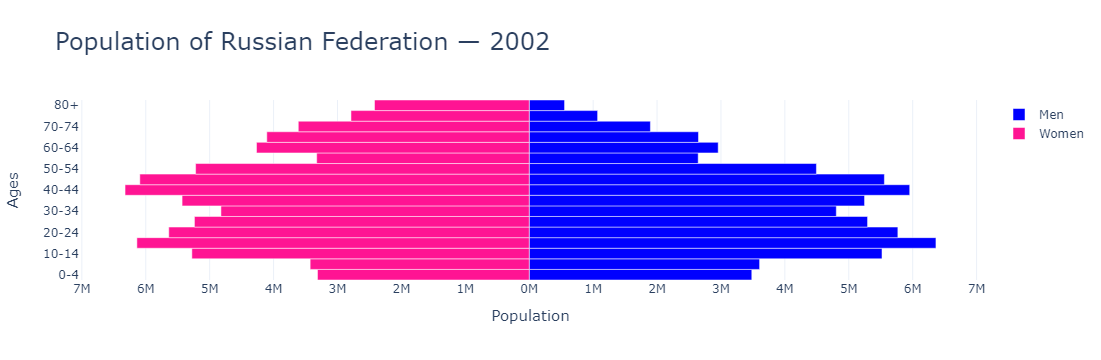

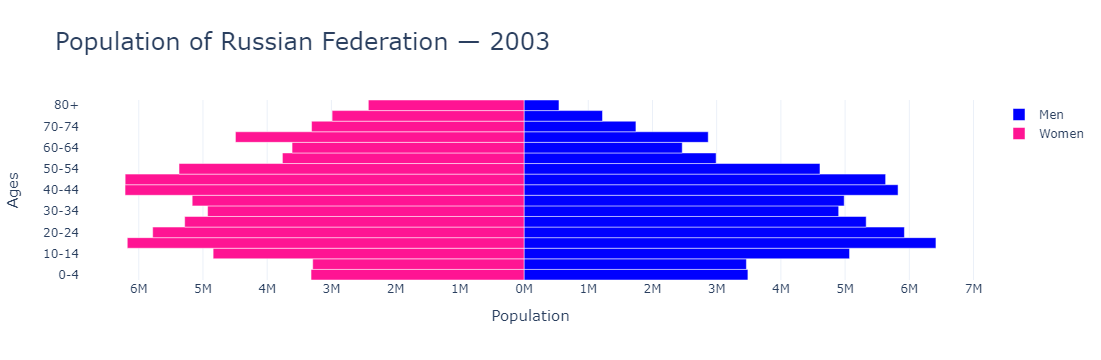

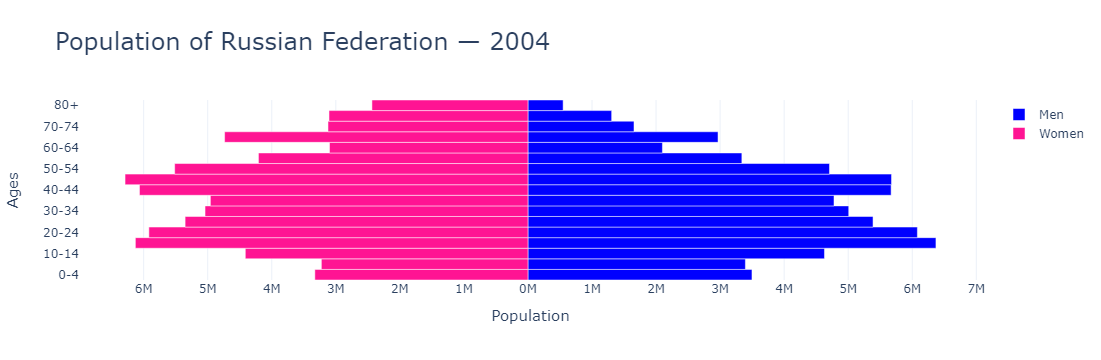

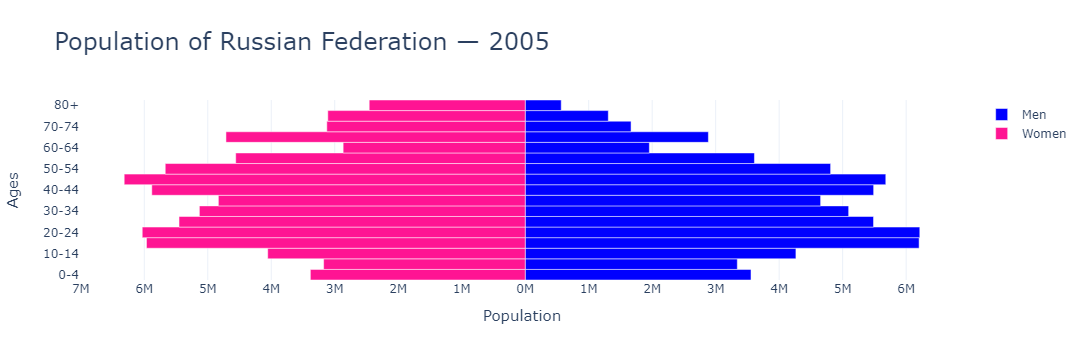

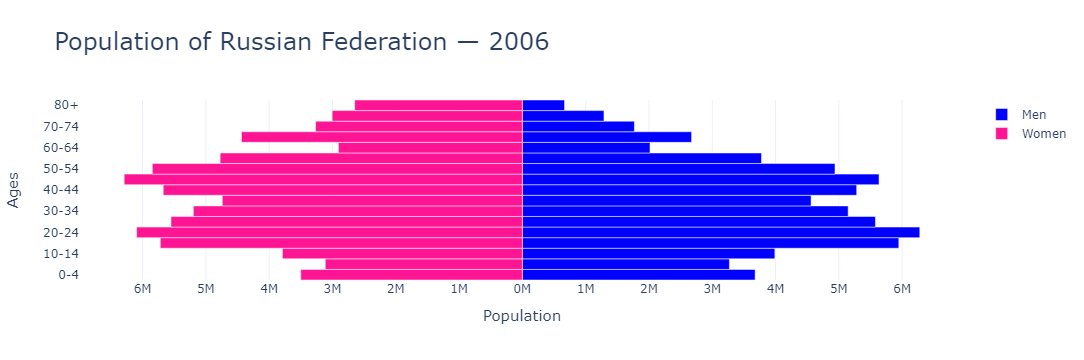

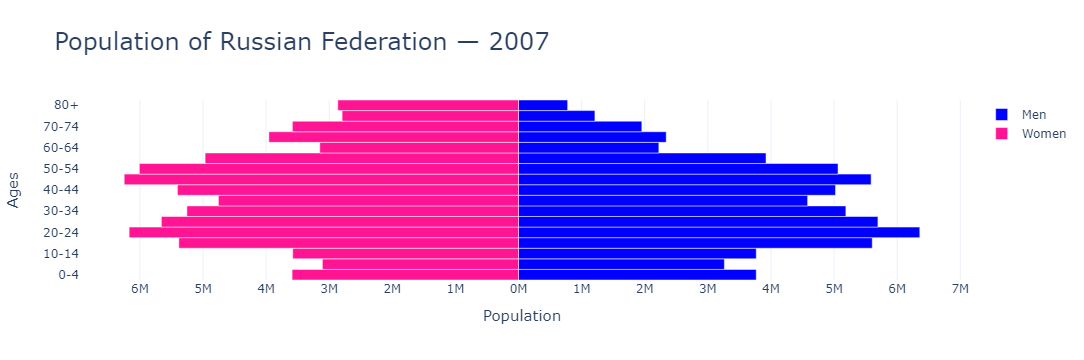

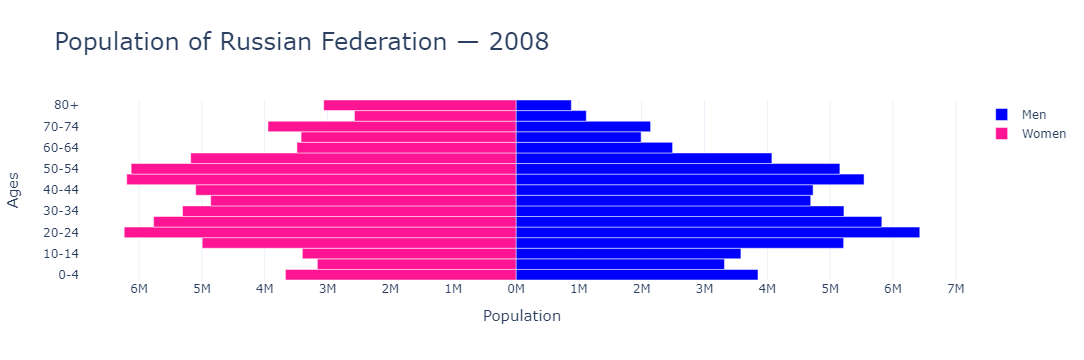

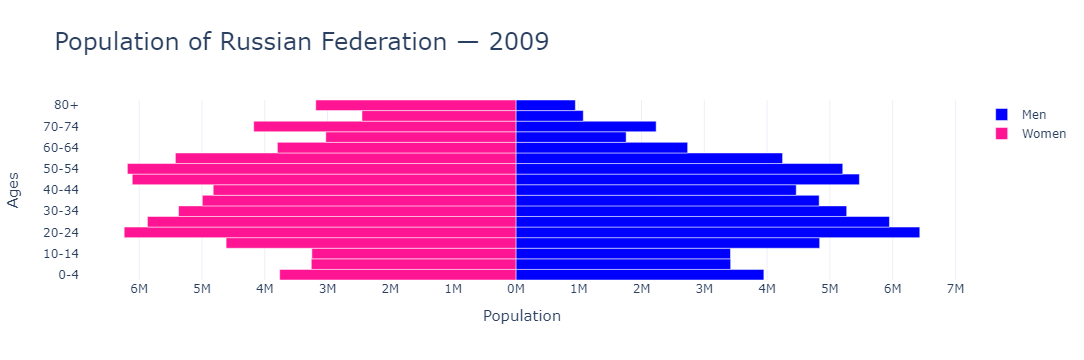

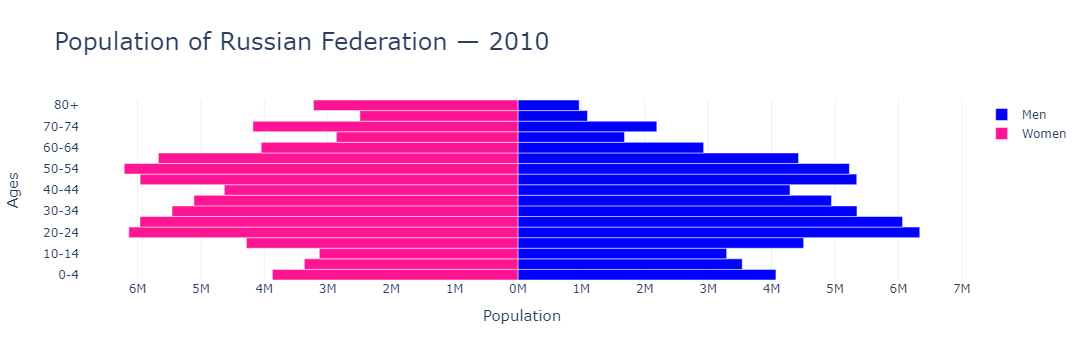

In [6]:
for ano in range(2000, 2011):
    piramide('Russian Federation', ano)

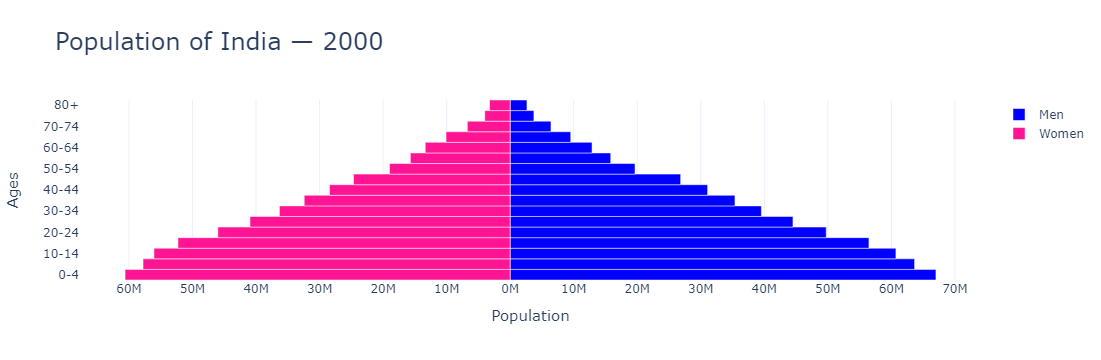

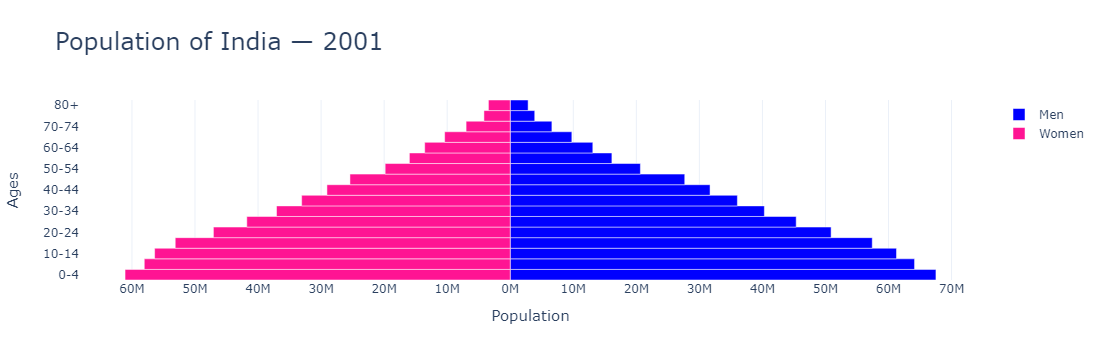

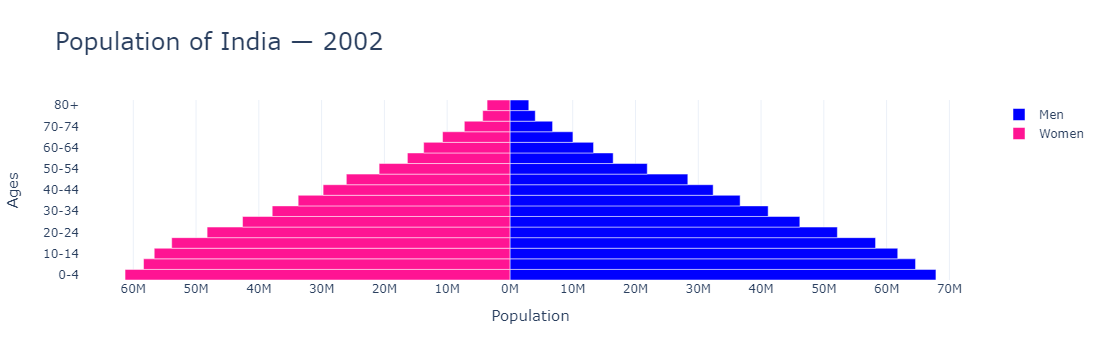

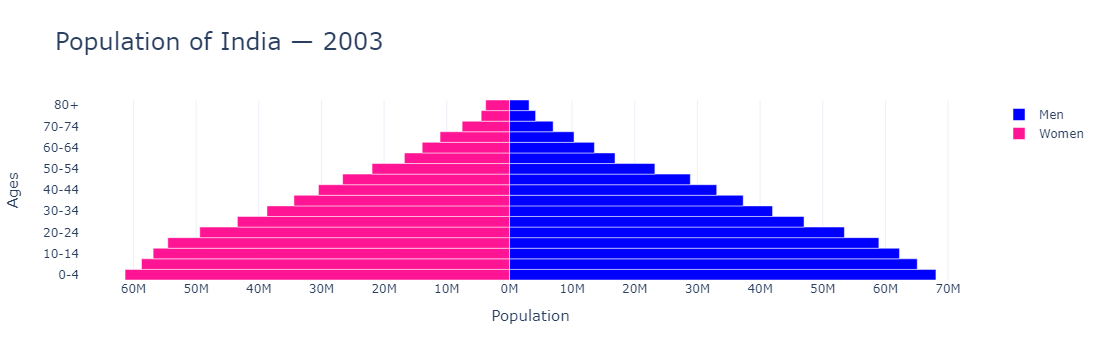

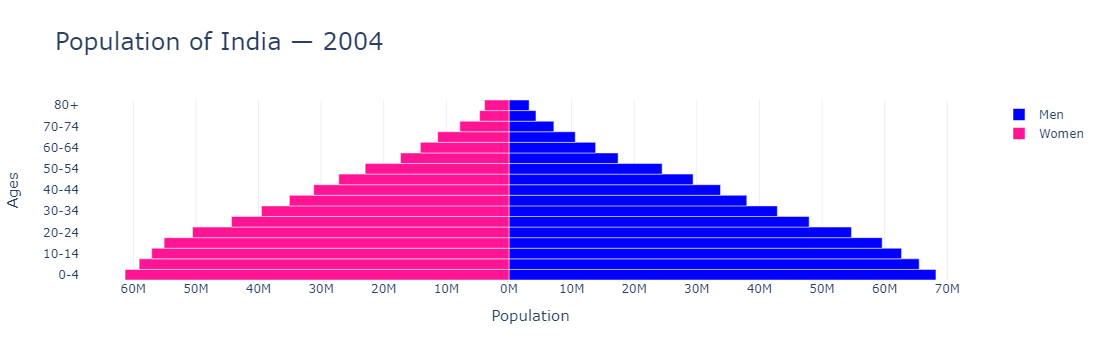

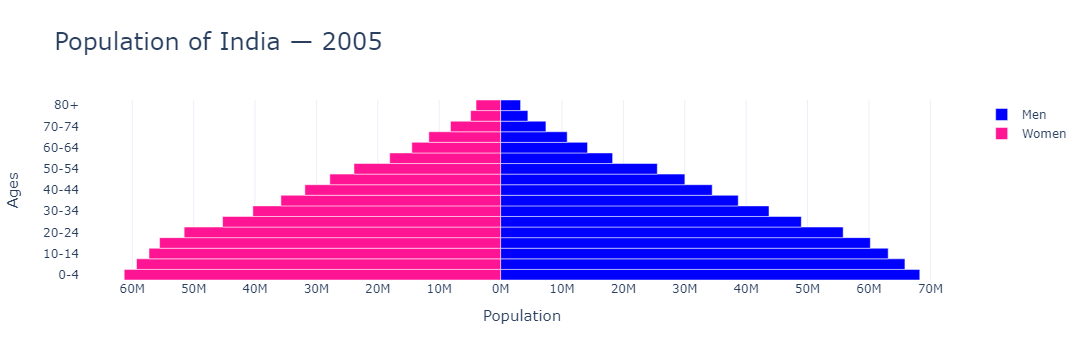

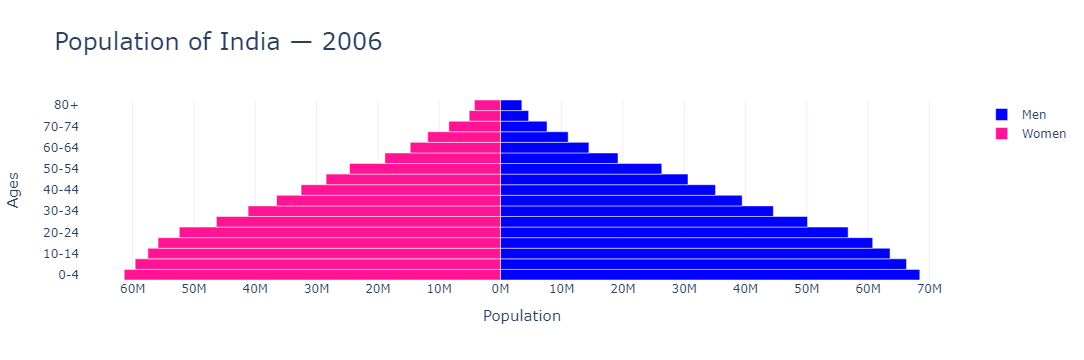

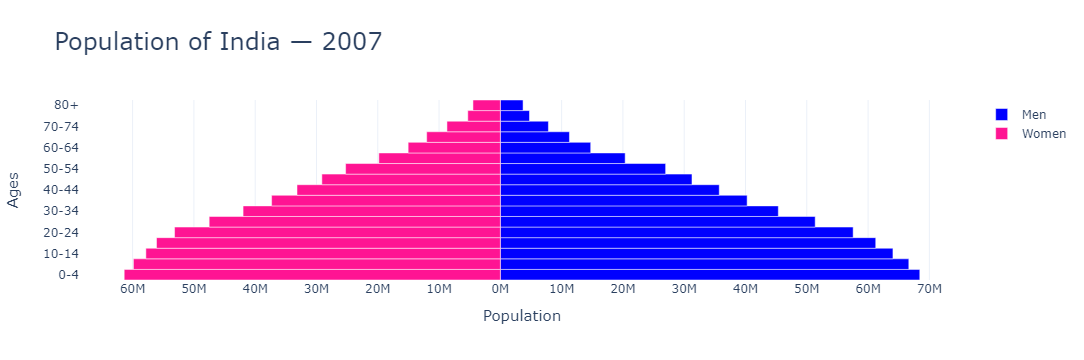

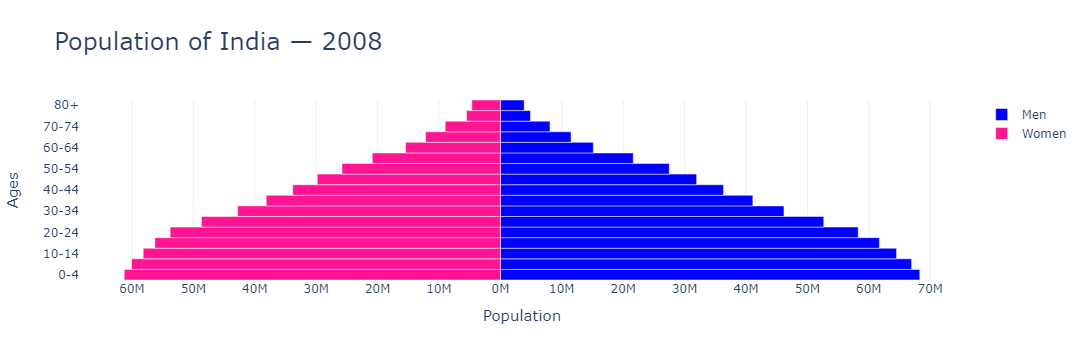

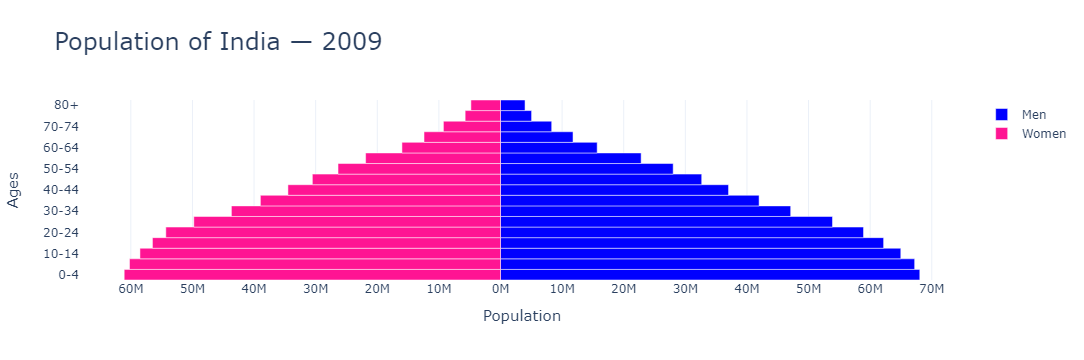

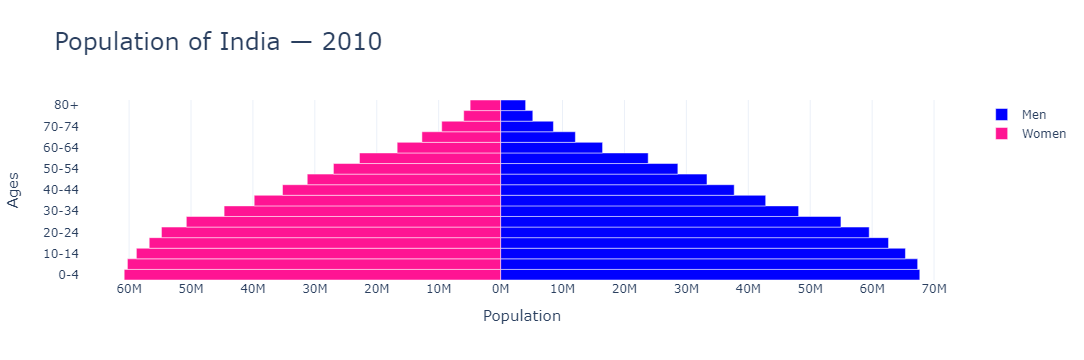

In [7]:
for ano in range(2000, 2011):
    piramide('India', ano)

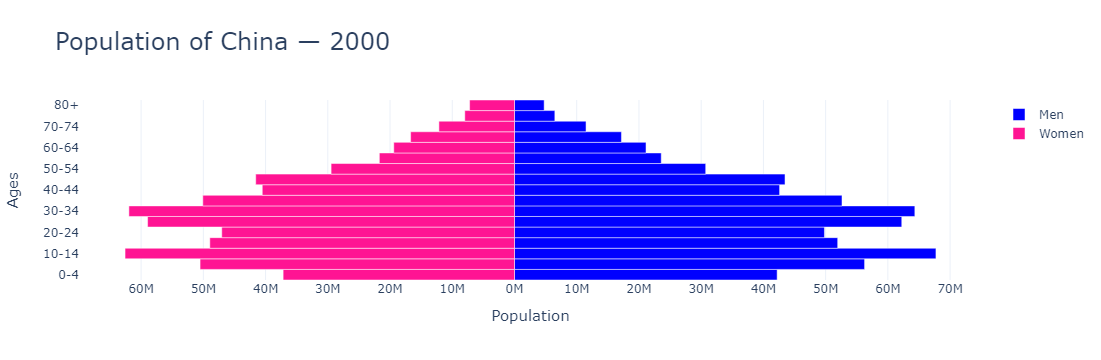

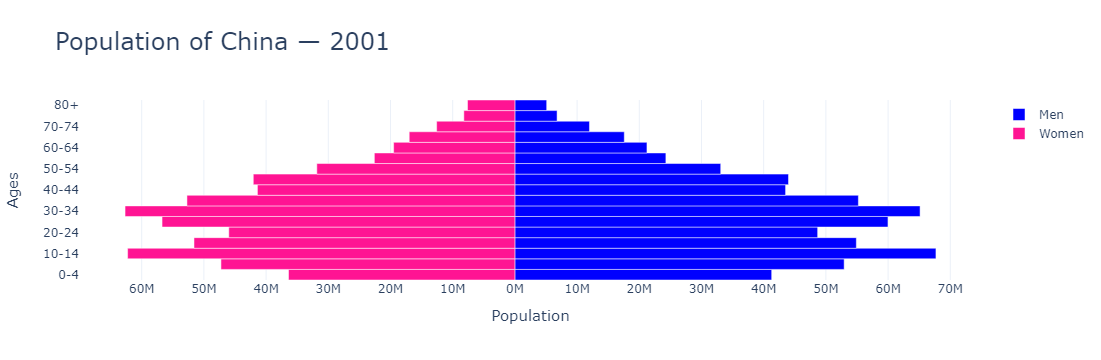

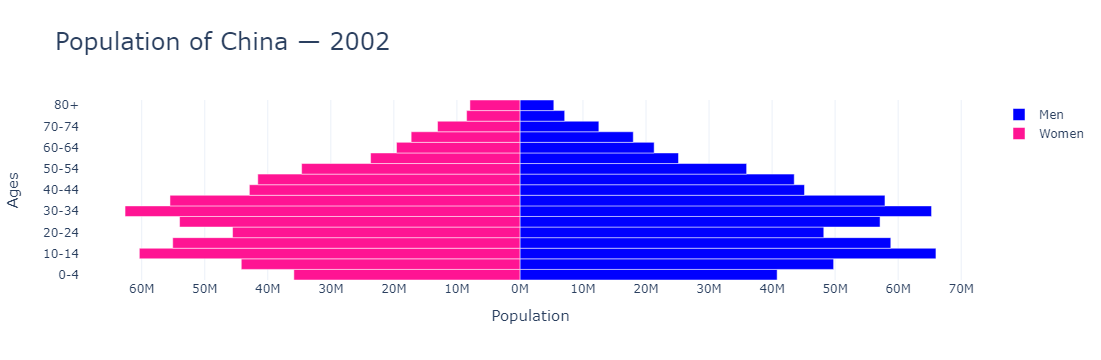

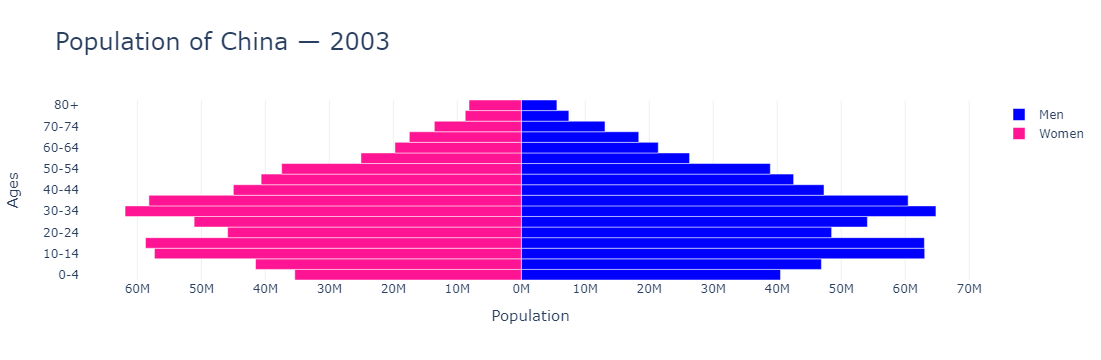

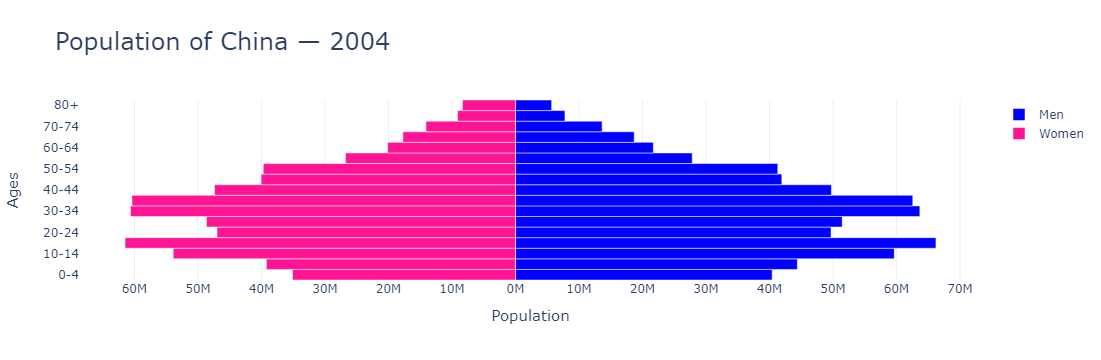

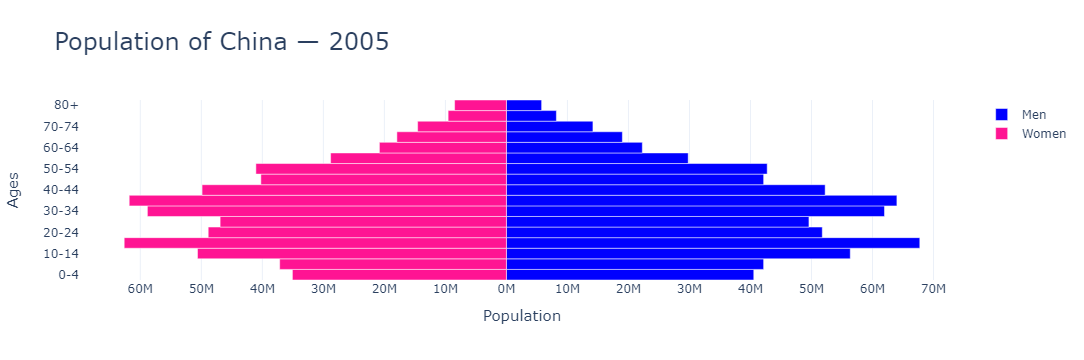

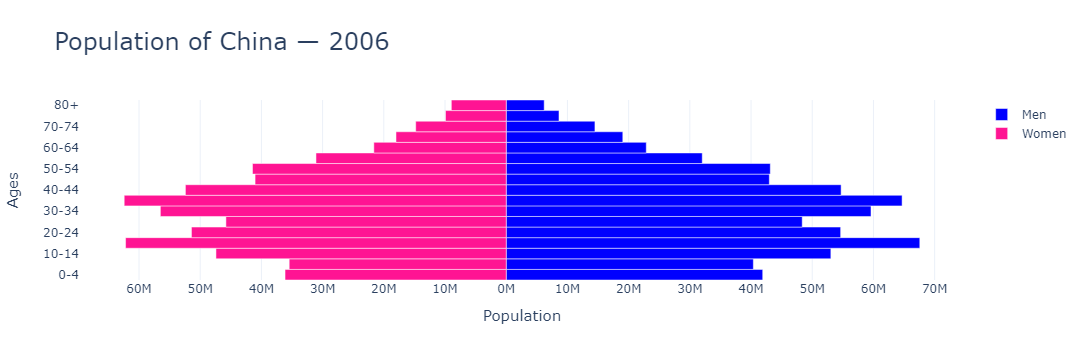

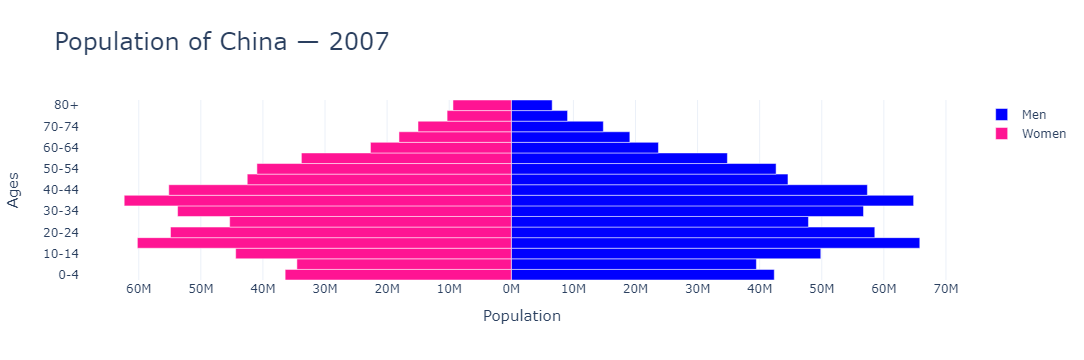

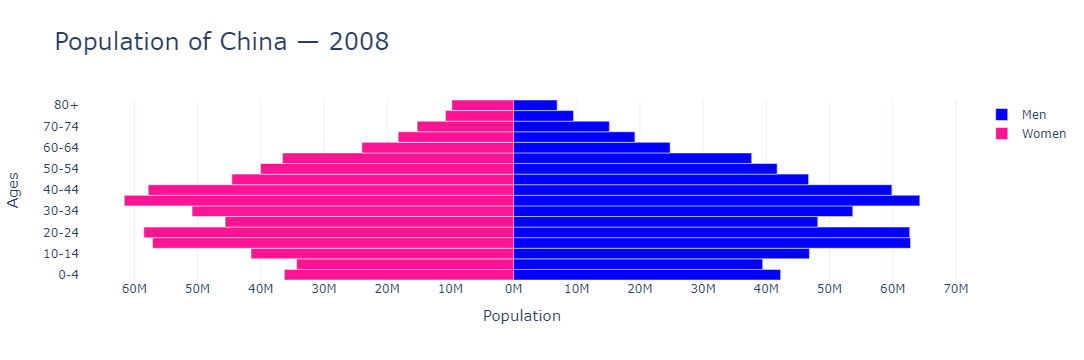

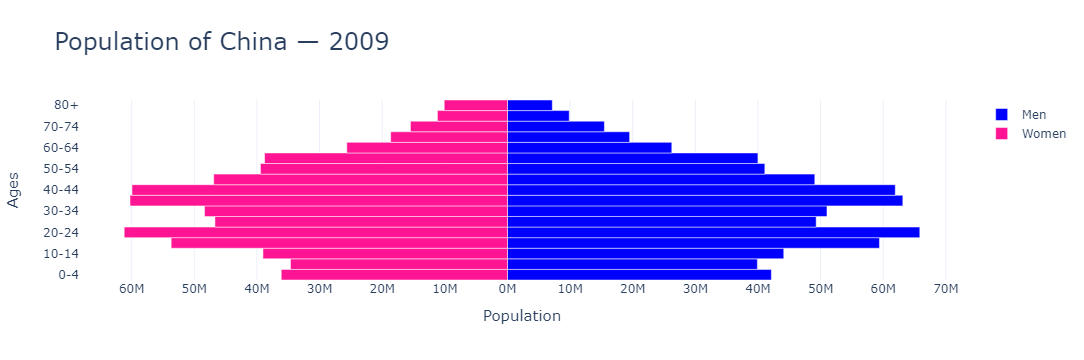

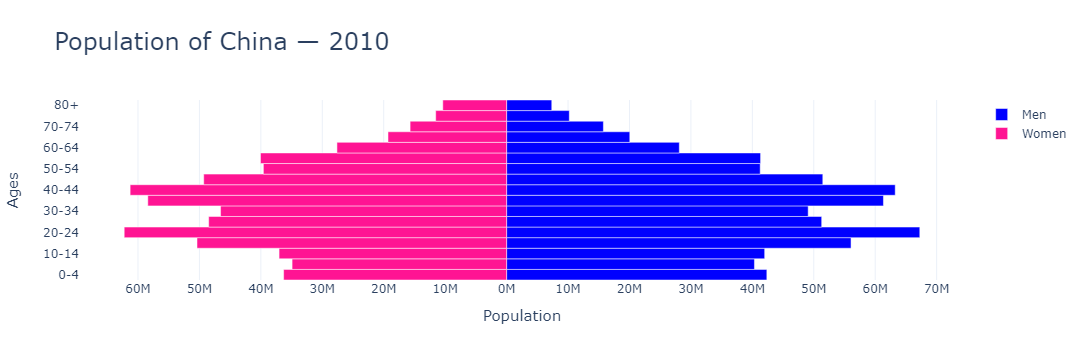

In [8]:
for ano in range(2000, 2011):
    piramide('China', ano)

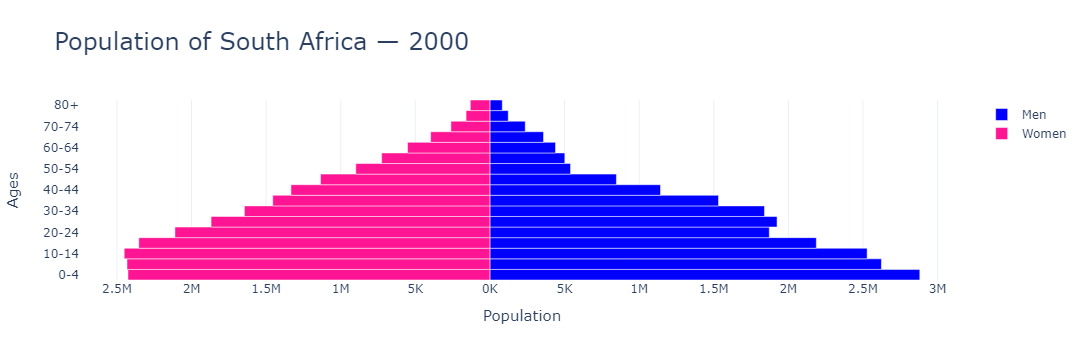

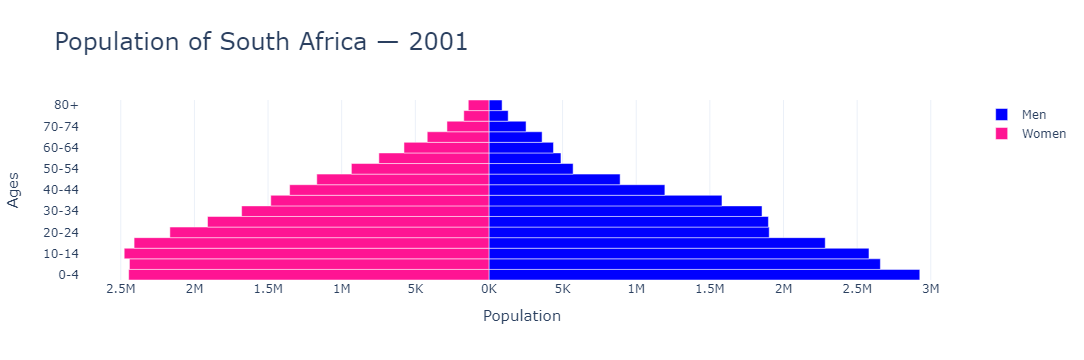

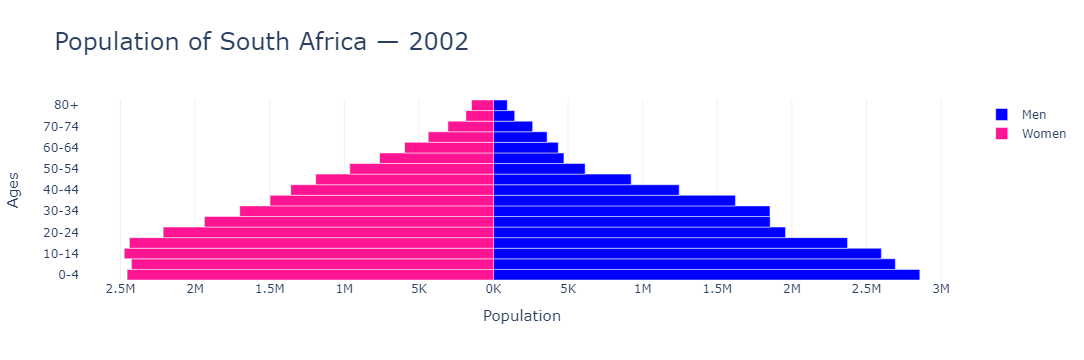

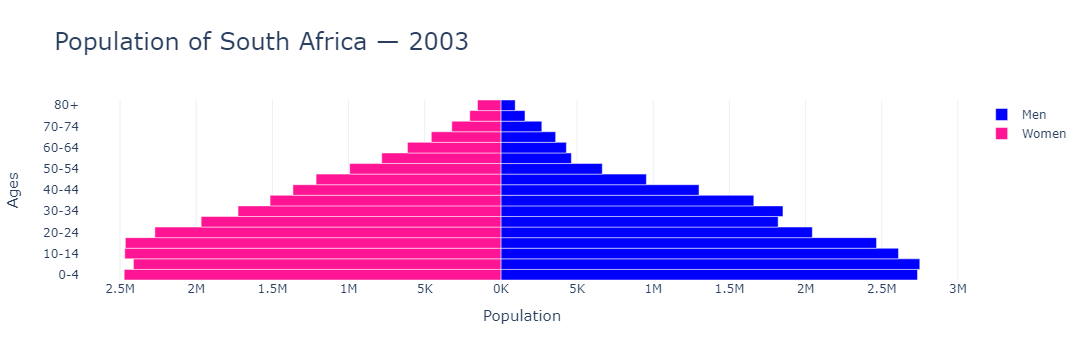

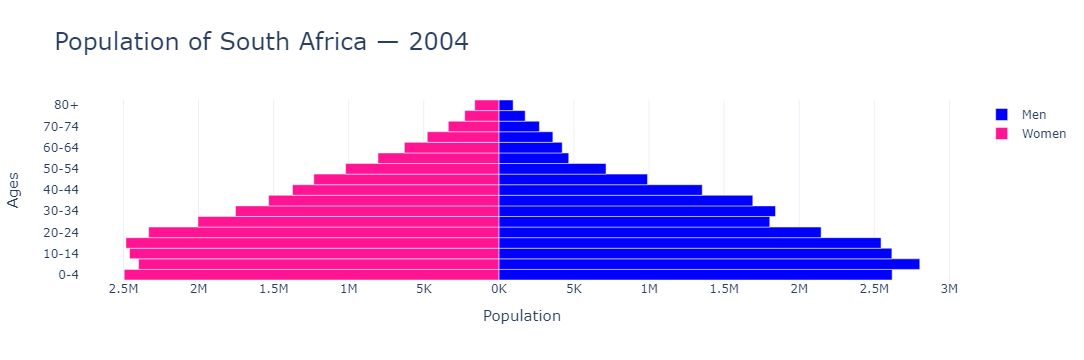

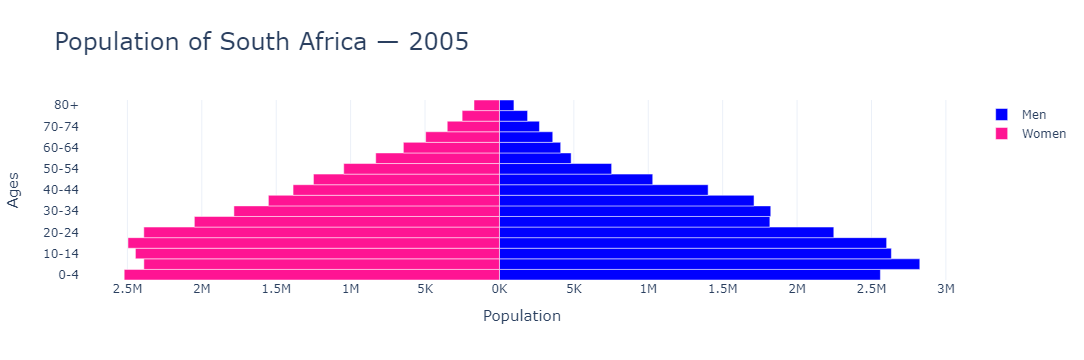

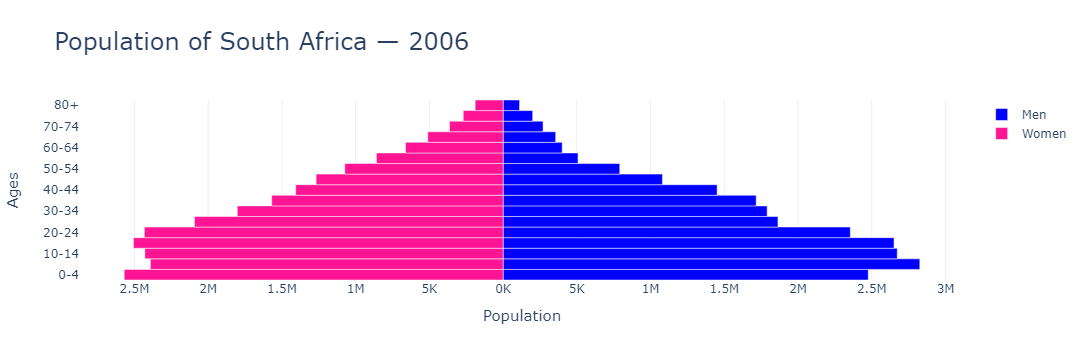

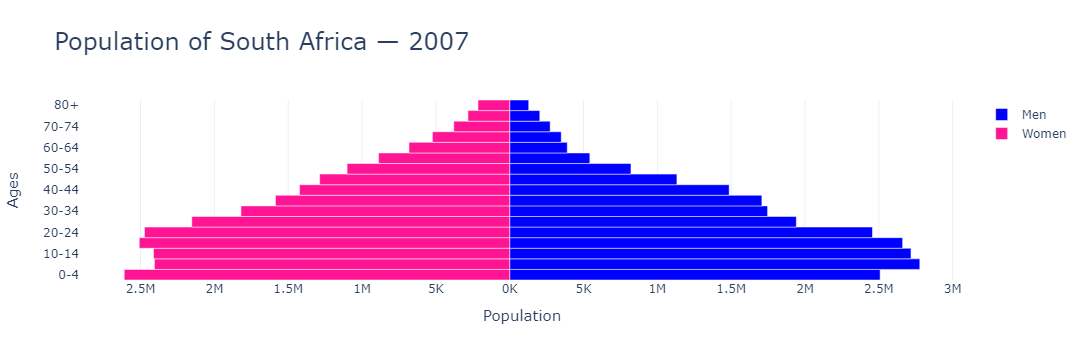

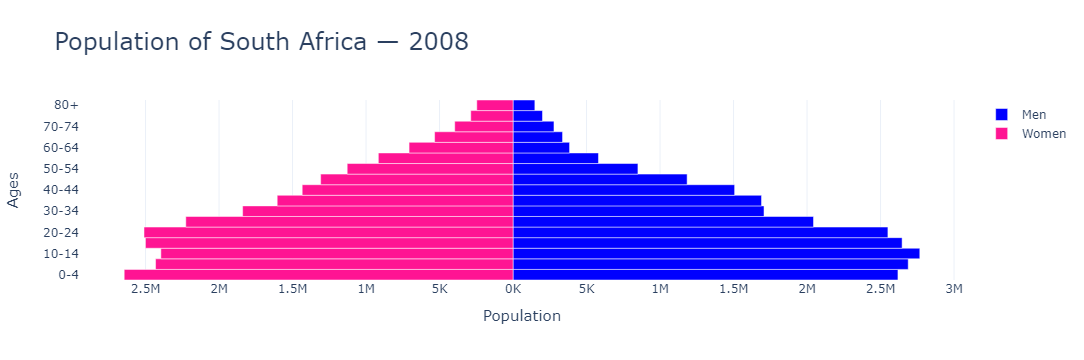

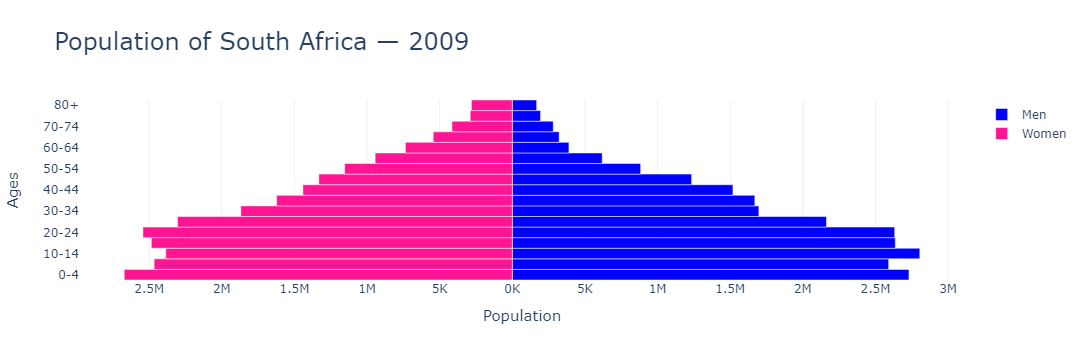

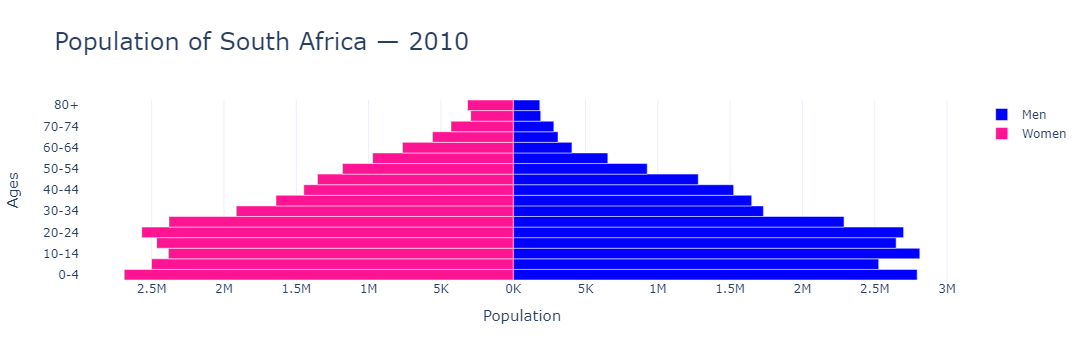

In [9]:
for ano in range(2000, 2011):
    piramide('South Africa', ano)

### Excepcionalmente, ao longo da primeira década, a Índia apresenta uma pirâmide perfeita (no que tange à figura geométrica), apesar de uma pequena diminuição da base. Simultaneamente, a pirâmide russa apresenta populações esparsas ao longo das faixas etárias: com uma base crescente e a peculiaridade de uma significativa diferença de mais idosas do que idosos — possível herança do militarismo soviético do século XX. Ademais, a pirâmide chinesa apresenta um tronco com a base no intervalo entre 44 a 30 e esparsidades até a faixa etária 0 a 4 — a qual, peculiarmente, mantem-se constante por volta da proporção 41 meninos para 36 meninas: evidenciando a rigorosa política de controle natalício que há no país. Ao final da década, a pirâmide sul-africana — após apresentar-se como a possível formação perfeita da figura geométrica (apesar de uma pequena diferença de menos adultos homens para mulheres) — passou a ter esparsidades nas faixas etárias mais jovens, porém, uma grande base. E, finalmente, a pirâmide brasileira apresenta um tronco compreendido até o intervalo de 15 a 24 e pequenas esparsidades até a base — a qual, apesar de grande, diminuiu ao longo da primeira década.

# Taxa de imunização contra a poliomielite ao longo dos anos:

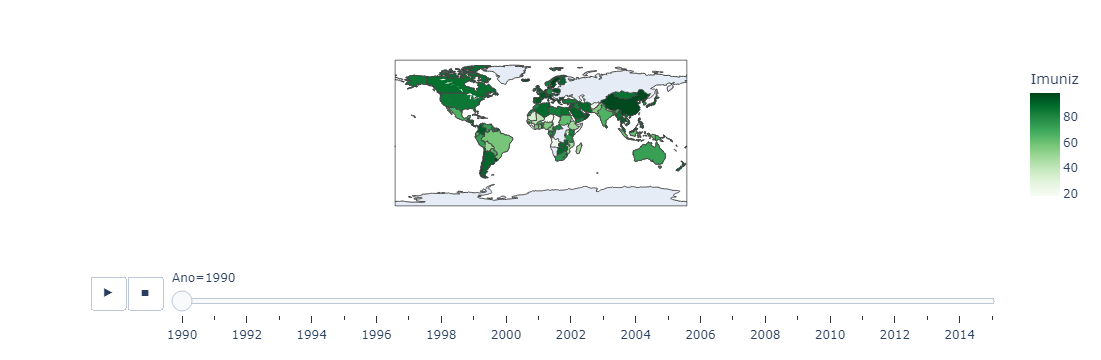

In [15]:
df = pd.read_csv('world_population.csv')    # Utilização de um dataframe auxiliar, pois o dataframe 'data' inclui regiôes
                                            # do mundo e o mapa deve contem apenas países

paises = list(set(df['CCA3']))  # transformação de uma série em lista
coluna = {'CCA3' : paises}      # Criação de um dicionario com chave 'CCA3' e o valor é uma lista com todos os países
c = pd.DataFrame(coluna)           # Criação de um datfarame com esse dicionário

im = data[data['Indicator Name'] == 'Immunization, Pol3 (% of one-year-old children)'] # Selecionando linhas especificas
d = im.rename(columns = {'Country Code':'CCA3'}, inplace=False) # Renomeando a coluna 'Country Code' para 'CCA3'
i = pd.merge(d, c, how = 'inner', on = 'CCA3')  # Com a renomeação da coluna é possivel aplicar 'merge' que resulta 
                                                # em um dataframe baseado na interseção entre o dataframe 'c' e o 'd'

idr = i.drop(list(range(1960,1990)), axis=1, inplace=False) # Exclusão das colunas que possuem como label os anos, 
                                                            # removendo de 1960 até 1989, pois não serão usadas


# Transformação de um dataframe largo para um dataframe longo utilizando 'for' a partir da variavel 'i' que representa
# os rótulos de linha
idr2 = pd.DataFrame()    
j = 0
for i in range(0, len(idr)):
    pais = idr.loc[i, 'Country Name']
    cc = idr.loc[i, 'CCA3']
    for ano in range(1990, 2016):
        idr2.loc[j, 'Ano'] = ano
        idr2.loc[j,'Imuniz'] = idr.loc[i, ano]
        idr2.loc[j,'country'] = pais
        idr2.loc[j,'Country Code'] = cc
        j = j + 1

x =idr2.astype({'Ano': int})  # transformando a coluna 'Ano' de string para inteiro
x
        
    
# Criando e plotando um mapa que varia suas cores conforme o ano e a taxa de imunização do país
fig = px.choropleth(x, locations="Country Code", color= 'Imuniz', hover_name="country",
     animation_frame = 'Ano', color_continuous_scale=px.colors.sequential.Greens)
fig.show()


### O mapa mostra que os países africanos e alguns países asiáticos apresentam a menor taxa de imunização ao longo de todos os anos, além de mostrar uma melhora do indice de imunização da América Latina no decorrer do tempo. Os países da America do Norte e da Europa com altas taxa de imunização. A Imunização de países como Afeganistão, Paquistão e India é mantem-se baixa ao longo desse periodo, se comparado com as taxas da Europa e melhora a partir de 2013. A Ucrania também é um caso peculiar, pois nos primeiros anos apresenta uma alta taxa de imunização, mas decai vertiginosamente a partir de 2008.

# Média  em porcentagem de desemprego (da força total de trabalho) entre 1991-2014 nas seguintes regiões: América Latina, América do Norte, União Europeia e África Sub-Saariana

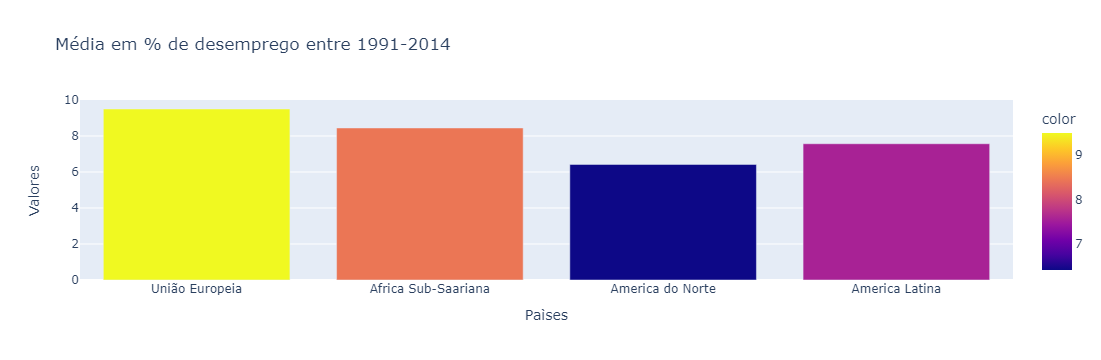

In [11]:
desemprego = data[(data['Indicator Name'] == 'Unemployment, total (% of total labor force)') & 
        (data['Country Name'].isin(['Sub-Saharan Africa', 'North America', 'Latin America & Caribbean',
        'European Union']))]  # Criando um dataframe a partir do original que é o 'data', somente com as linhas que 
                 # apresentam o indicador do desemprego e selecionando as regiões do mundo em estudo com o método .isin()

    
# Obtendo os valores de cada região entre 1991-2014 usando .loc 
uniao = desemprego.loc[desemprego['Country Name'] == 'European Union', range(1991, 2015)]
sub_africa = desemprego.loc[desemprego['Country Name'] == 'Sub-Saharan Africa' , range(1991, 2015)]
north = desemprego.loc[desemprego['Country Name'] == 'North America', range(1991, 2015)]
latina =  desemprego.loc[desemprego['Country Name'] == 'Latin America & Caribbean', range(1991, 2015)]

# Colocando os valores obtidos em listas
lista_uniao = list(uniao.iloc[0])
lista_sub_africa = list(sub_africa.iloc[0])
lista_north = list(north.iloc[0])
lista_latina = list(latina.iloc[0])

# Calculando a média com as funções sum() e len() 
media_uniao = sum(lista_uniao)/len(lista_uniao)
media_sub_africa = sum(lista_sub_africa)/len(lista_sub_africa)
media_north = sum(lista_north)/len(lista_north)
media_latina = sum(lista_latina)/len(lista_latina)


# Criando um dicionario com as médias de cada região e convertendo o mesmo para dataframe para plotar o gráfico
dicionario = {'Taxa_EUU': media_uniao, 'Taxa_SSA': media_sub_africa, 'Taxa_NAC': media_north, 
    'Taxa_LCN': media_latina}
df = pd.DataFrame([dicionario])

# Criando e plotando o gráfico de barras com o dataframe, onde o x representa as regiões e o y as medias da porcentagem de 
# desemprego da força total de trabalho
fig = px.bar(df, x = ['União Europeia', 'Africa Sub-Saariana', 'America do Norte', 'America Latina'], y = df.iloc[0], 
        color = df.iloc[0], labels = {'x':'Paìses', 'y':'Valores'}, title = 'Média em % de desemprego entre 1991-2014')
fig.show()


### O gráfico mostra que a região da União Europeia sofreu mais com o desemprego, a porcentagem da força total de trabalho desempregada foi maior nessa região, cerca de 10% em media, entre 1991-2014, seguida da região da Africa Sub-Saariana. A região menos afetada foi a América do Norte.

# As  instalações sanitárias melhoradas (% da população com acesso) de 1990 a 2015 nas regiões do planeta

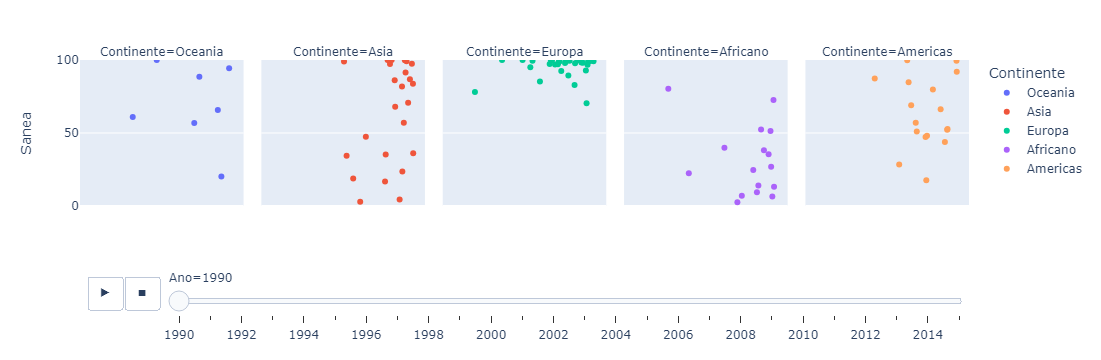

In [12]:
# Filtrando o dataframe de acordo com a condição (instalções sanitarias melhoradas, % da população com acesso)
sanea= data[data['Indicator Name'] == 'Improved sanitation facilities (% of population with access)']

# Selecionando os países com o método .isin()
paises = sanea[(sanea['Country Name']. isin(['China', 'India', 'Pakistan', 'Bangladesh', 'Syria', 'Japan', 'Indonesia',
        'Thailand', 'South Korea', 'Philippines', 'Singapore', 'Vietnam', 'Malaysia', 'Hong Kong', 'Taiwan', 'Iran',
        'Saudi Arabia', 'Cambodia', 'Myanmar', 'Afghanistan', 'Israel', 'Qatar', 'Laos', 'Sri Lanka', 'Mongolia',
        'Nepal', 'Maldives', 'Iraq', 'Uzbekistan', 'North Korea', 'Armenia', 'Macao',
        'Lebanon', 'United Arab Emirates', 'Kyrgyzstan', 'Jordan', 'Tajikistan', 'Bhutan','Turkmenistan', 'Yemen',
        'Palestine', 'Oman', 'Kuwait', 'Timor-Leste', 'Bahrain', 'Germany', 'United Kingdom', 'Italy', 'France', 'Ukraine',
        'Netherlands', 'Switzerland', 'Greece', 'Poland', 'Austria', 'Sweden', 'Belgium', 'Norway', 'Ireland', 'Denmark',
        'Croatia', 'Serbia', 'Malta', 'Iceland', 'Finland', 'Romania', 'Hungary','Bulgaria', 'Luxembourg', 'Albania',
        'Cyprus', 'Slovenia', 'Estonia', 'Lithuania', 'Belarus', 'Liechtenstein', 'Monaco', 'Montenegro', 'Kosovo',
        'Bosnia and Herzegovina', 'Slovakia', 'North Macedonia','Andorra', 'Portugal', 'South Africa', 'Nigeria', 'Kenya',
        'Democratic Republic of Congo', 'Ghana', 'Morocco', 'Mali', 'Senegal', 'Tanzania', 'Ethiopia', 'Uganda',
        'Sudan', 'Madagascar', 'Angola', 'Somalia', 'Cameroon', 'Algeria', 'Tunisia', 'United States', 'Canada', 'Mexico',
        'Argentina','Uruguay', 'Paraguay', 'Bolivia', 'Colombia', 'Ecuador', 'Peru', 'Haiti', 'Chile', 'Venezuela', 
        'Nicaragua', 'Guatemala', 'El Salvador', 'Honduras', 'Jamaica', 'Pacific island small states', 'New Zealand',
        'Australia','Fiji', 'Papua New Guinea', 'Tonga','Solomon Islands', 'American Samoa', 'Guam', 'Nauru']))]
paises_fil =paises.drop(list(range(1960,1990)), axis=1, inplace=False) # Removendo as colunas que possui como label os anos
                                                                       # de 1960-1989, pois são NaN

# Agrupando os países em listas de acordo com o continente que os mesmos pertencem, pois o continente dos países não é
# apresentado no conjunto de dados
africa = ['South Africa', 'Nigeria', 'Kenya',
        'Democratic Republic of Congo', 'Ghana', 'Morocco', 'Mali', 'Senegal', 'Tanzania', 'Ethiopia', 'Uganda',
        'Sudan', 'Madagascar', 'Angola', 'Somalia', 'Cameroon', 'Algeria', 'Tunisia']
asia = ['China', 'India', 'Pakistan', 'Bangladesh', 'Syria', 'Japan', 'Indonesia',
        'Thailand', 'South Korea', 'Philippines', 'Singapore', 'Vietnam', 'Malaysia', 'Hong Kong', 'Taiwan', 'Iran',
        'Saudi Arabia', 'Cambodia', 'Myanmar', 'Afghanistan', 'Israel', 'Qatar', 'Laos', 'Sri Lanka', 'Mongolia',
        'Nepal', 'Maldives', 'Iraq', 'Uzbekistan', 'North Korea', 'Armenia', 'Macao',
        'Lebanon', 'United Arab Emirates', 'Kyrgyzstan', 'Jordan', 'Tajikistan', 'Bhutan','Turkmenistan', 'Yemen',
        'Palestine', 'Oman', 'Kuwait', 'Timor-Leste', 'Bahrain']
america = ['United States', 'Canada', 'Mexico',
        'Argentina','Uruguay', 'Paraguay', 'Bolivia', 'Colombia', 'Ecuador', 'Peru', 'Haiti', 'Chile', 'Venezuela', 
        'Nicaragua', 'Guatemala', 'El Salvador', 'Honduras', 'Jamaica']
oceania = ['Pacific island small states', 'New Zealand',
        'Australia', 'Fiji', 'Papua New Guinea', 'Tonga','Solomon Islands', 'American Samoa', 'Guam', 'Nauru']
europa = ['Germany', 'United Kingdom', 'Italy', 'France', 'Ukraine',
        'Netherlands', 'Switzerland', 'Greece', 'Poland', 'Austria', 'Sweden', 'Belgium', 'Norway', 'Ireland', 'Denmark',
        'Croatia', 'Serbia', 'Malta', 'Iceland', 'Finland', 'Romania', 'Hungary','Bulgaria', 'Luxembourg', 'Albania',
        'Cyprus', 'Slovenia', 'Estonia', 'Lithuania', 'Belarus', 'Liechtenstein', 'Monaco', 'Montenegro', 'Kosovo',
        'Bosnia and Herzegovina', 'Slovakia', 'North Macedonia','Andorra', 'Portugal']

# Agrupando os países que foram selecionandos no dataframe chamado 'paises' e classificando-os por meio de sua presença em
# uma das listas criadas acima, e criando uma nova coluna no dataframe 'paises_fil' chamada 'Continente', com os elementos
# da lista 'conti'
conti= []
for nação in list(paises['Country Name']):
    if nação in africa:
        conti.append('Africano')
    elif nação in asia:
        conti.append('Asia')
    elif nação in europa:
        conti.append('Europa')
    elif nação in america:
        conti.append('Americas')
    elif nação in oceania:
        conti.append('Oceania')
df = paises_fil.assign(Continente = conti)
df_in = df.reset_index(drop = True) # Alterando os rótulos de linha, fazendo-os começar do zero e seguindo uma ordem 
                                    # crescente

#Criando um novo dataframe para transformar o dataframe largo em dataframe longo utilizando o 'for' a partir dos rotulos
# de linha, representado pela variavel 'i'
df2 = pd.DataFrame()
j = 0

for i in range(0, len(df_in)):
    pais = df_in.loc[i, 'Country Name']
    cc = df_in.loc[i, 'Country Code']
    con = df_in.loc[i, 'Continente'] 
    for ano in range(1990, 2016):
        df2.loc[j,'Ano'] = ano
        df2.loc[j,'Sanea'] = df_in.loc[i, ano]
        df2.loc[j,'Country Name'] = pais
        df2.loc[j,'Country Code'] = cc
        df2.loc[j,'Continente'] = con
        j = j + 1
    
x = df2.astype({'Ano': int})  # transformação da coluna 'Ano' de string para inteiro

# Plotando o gráfico
fig = px.scatter(x, y="Sanea", animation_frame="Ano", animation_group="Country Name",
           color="Continente", hover_name="Country Name", facet_col="Continente",
           log_x=True, range_y=[0,100])
fig.update_xaxes(visible=False)
fig.show()


### Ao longo dos anos, a Europa manteve-se na frente no que tange à acessibilidade ao saneamento básico. Em contrapardida, a Africa esteve na retaguarda nesse quesito, apresentando uma pequena variação. Simultaneamente, a Asia apresentou uma grande variação, tendo vários de seus países melhorado suas taxas de acessibilidade ao saneamento. Ademais, a Oceania não apresentou mudanças significativas — exceto localidades como Fiji . E, finalmente, a América apresentou uma melhora considerável, contudo, um pouco menos significativa que a apresentada pela Ásia.

# Comparando a taxa de fertilidade entre jovens nos países lusófonos e hispânicos

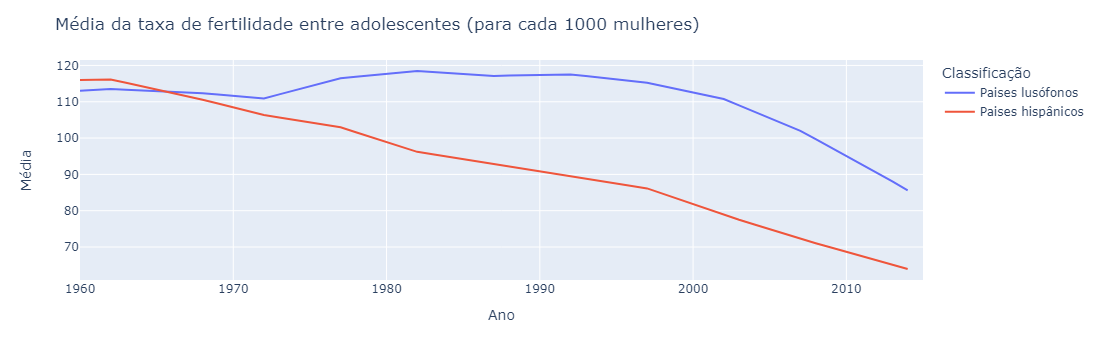

In [13]:
# Filtrando todos países hispânicos e lusófonos em um novo dataframe

latinos = data[(data['Indicator Name'] == 'Adolescent fertility rate (births per 1,000 women ages 15-19)') & 
(data['Country Name'].isin(['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
'El Salvador', 'Spain','Ecuador', 'Guatemala', 'Equatorial Guinea', 'Honduras', 'Mexico', 'Nicaragua', 'Panama',
'Paraguay', 'Peru', 'Puerto Rico', 'Dominican Republic', 'Uruguay', 'Venezuela', 'Brazil', 'Angola', 'Cabo Verde', 'Guinea-Bissau', 'Mozambique', 
'Portugal', 'Sao Tome and Principe','Timor-Leste', 'Equatorial Guinea']))]

# Criando listas para a classificação de cada país do dataframe

lusofonos = ['Brazil', 'Angola', 'Cabo Verde', 'Guinea-Bissau', 'Mozambique', 
'Portugal', 'Sao Tome and Principe','Timor-Leste']
hispanicos = ['Argentina', 'Bolivia', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
'El Salvador', 'Spain','Ecuador', 'Guatemala', 'Equatorial Guinea', 'Honduras', 'Mexico', 'Nicaragua', 'Panama',
'Paraguay', 'Peru', 'Puerto Rico', 'Dominican Republic', 'Uruguay', 'Venezuela']

# Atribuindo classificação L ou H para cada país do dataframe (isso facilitará a posterior soma)

clas = []
for pais in list(latinos['Country Name']):
    if pais in lusofonos:
        clas.append('L')
    if pais in hispanicos:
        clas.append('H')

# Concatenando a lista clas que classifica, ordenadamente, cada país do dataframe

df = latinos.assign(Classificacao = clas)

# Filtrando os países pelas classificações L (lusófonos) e H (hispânicos)

lus = df[df.Classificacao == 'L']
his = df[df.Classificacao == 'H']
colunas = list(df.columns)

# Intervalo dos anos 
year = colunas[4:len(colunas) - 2]

# Listas para a posterior criação de um novo dataframe (o qual será plotado no gráfico)
a = []
m = []
c = []

# Obtendo a média de fertilidade entre países lusófonos e hispânicos em cada ano

for y in year:
    a.append(y)
    m.append(lus[y].mean())
    c.append('Paises lusófonos')
    a.append(y)
    m.append(his[y].mean())
    c.append('Paises hispânicos')
    
# Criando o dataframe que será plotado no gráfico

dic = {
    'Ano' : a,
    'Média' : m,
    'Classificação': c
}
dataf = pd.DataFrame(dic)

# Sendo x e y, respectivamente, a coluna 'Ano' e 'Média' do dataframe 'dataf',
# eis a plotagem no gráfico:

fig = px.line(dataf, x='Ano', y='Média', color='Classificação')
fig.update_layout(title='Média da taxa de fertilidade entre adolescentes (para cada 1000 mulheres)')
fig.show()

### De 1960 a 2010, países hispânicos tiveram uma taxa de fertilidade entre adolescentes em constante queda; enquanto países lusófonos, após certa estabilidade, teve seu ponto de inflexão por volta de 1970 e, posteriormente, um crescimento que resultou numa parábola de concavidade para baixo — mantendo-se em queda constante após 1990.

### Portanto, é importante salientar que os dados socioeconomicos são de grande valor e sua análise traz conclusões que podem auxiliar no entendimento de vários fatores que refletem o nivel de desenvolvimento de cada nação. A visualização grafica, de modo geral, torna visivel e notório o desenvolvimento de alguns países em relação a outros.